In [1]:
import requests
import matplotlib.pyplot as plt
from zlib import adler32
import networkx as nx
from tqdm.notebook import tqdm
import scipy.stats as st
import numpy as np

In [3]:
stats =  {"number_nodes": 1882, 
"radius": [15, 2], 
"diameter": [28, 4], 
"average_clustering": [0.005066798238955518, 0.001], 
"average_path_length": [11.748410823170731, 2], 
"number_cc": [168, 32], 
"degree_cdf": [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 24, 46], 
               [0.0, 0.6902231668437833, 0.8517534537725824, 0.9086078639744952, 0.9378320935175345, 0.9516471838469713, 0.9654622741764081, 0.9723698193411264, 0.9776833156216791, 0.9808714133900106, 0.9845908607863975, 0.9888416578108395, 0.9893730074388948, 0.9925611052072264, 0.9936238044633369, 0.9952178533475027, 0.9957492029755579, 0.9968119022316685, 0.997874601487779, 0.9989373007438895, 0.9994686503719448, 1.0]]}

In [324]:
[(0, 1)] + [(i, i+1) for i in range(1, 15)]

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (10, 11),
 (11, 12),
 (12, 13),
 (13, 14),
 (14, 15)]

In [334]:
G = nx.Graph()
n = 0 * 15
arr1 = [(0, 1 + n)] + [(i + n, i+1 + n) for i in range(1, 15)]
n = 1 * 15
arr2 = [(0, 1 + n)] + [(i + n, i+1 + n) for i in range(1, 15)]
n = 2 * 15
arr3 = [(0, 1 + n)] + [(i + n, i+1 + n) for i in range(1, 15)]
G.add_edges_from(arr1)
G.add_edges_from(arr2)
G.add_edges_from(arr3)
# G.add_edges_from([(i+15, i+1+15) for i in range(15)])
# G.add_edges_from([(i+30, i+1+30) for i in range(15)])
nx.diameter(G), nx.radius(G)






(30, 15)

In [349]:
G = nx.Graph()
for i in range(103):
    n = i * 15
    arr = [(0, 1 + n)] + [(i + n, i+1 + n) for i in range(1, 15)]
    G.add_edges_from(arr)


nx.diameter(G), nx.radius(G)

(30, 15)

In [350]:
for i in range(max(G.nodes), 1881, 2):
    G.add_edge(i, i+1)

In [351]:
max(G.nodes)

1880

In [352]:
G.add_edge(max(G.nodes), 1881)

In [353]:
len(G.nodes)

1882

In [356]:
def select_gygantic_component(g: nx.Graph) -> nx.Graph:
    conn_subgrs = [g.subgraph(each) for each in nx.connected_components(g)]
    gcomp = max(nx.connected_components(g), key=len)
    giant = g.subgraph(gcomp)
    return giant

gcc = select_gygantic_component(G)

nx.diameter(gcc)

31

In [357]:
nx.radius(gcc)

16

In [358]:
nx.average_clustering(G) # 0.005 +- 0.001

0.0

In [359]:
nx.number_connected_components(G) # 168 +- 32

168

In [360]:
lst = list(map(lambda x: f'{x[0]} {x[1]}\n', list(G.edges)))

with open('file.txt', 'w') as f: 
    f.writelines(lst)
# list(G.edges)

------------------

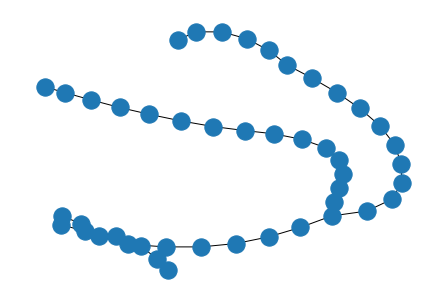

In [333]:
nx.draw(G)

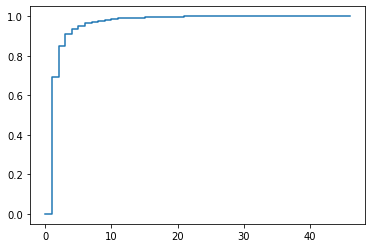

In [4]:
q_seq, p_seq = stats['degree_cdf']
plt.plot(
    np.append(np.repeat(q_seq, 2)[1:], q_seq[-1]), 
    np.repeat(p_seq, 2)
)
plt.show()


In [16]:
G = nx.barabasi_albert_graph(1882, 1, seed=3)

In [29]:
G = nx.gnp_random_graph(1882, 10)

In [ ]:
def random_edges(nodes, p):
    n = len(nodes)
    edges = []
    v=1
    w=-1 
    lp=np.log(1.0-p)
    while v<n: 
        lr=np.log(1.0-np.random.random()) 
        w=w+1+int(lr/lp)
        while w>=v and v<n:
            w=w-v 
            v=v+1 
        if v<n:
            edges.append((v, w))

    return np.array(edges)

def random_from_real(graph):
    # YOUR CODE HERE
    G = nx.Graph()
    # G.add_nodes_from(graph.nodes)
    nodes = graph.nodes
    n = len(nodes)

    average_node_degree = np.mean(list(dict(graph.degree).values()))
    p = average_node_degree / (n - 1) 

    edges = random_edges(nodes, p)
    G.add_edges_from(edges)

    max_node_real = int(max(graph.nodes))

    while n > len(G.nodes):
        max_node_real += 1
        G.add_node(str(max_node_real))

    
    return G 
    

G = nx.dual_barabasi_albert_graph(1882, 1, 1, 0.05, seed=0)
G = nx.dual_barabasi_albert_graph(1882, 1, 1, 0.1, seed=0)



G = nx.fast_gnp_random_graph(1882, 0.0013, seed=0)

In [286]:
G = nx.fast_gnp_random_graph(1882, 0.0013, seed=0)

def select_gygantic_component(g: nx.Graph) -> nx.Graph:
    conn_subgrs = [g.subgraph(each) for each in nx.connected_components(g)]
    gcomp = max(nx.connected_components(g), key=len)
    giant = g.subgraph(gcomp)
    return giant

gcc = select_gygantic_component(G)

In [303]:
nx.approximation.diameter(gcc)

19

In [310]:
nx.diameter(gcc) # 28 +- 4

In [301]:
for iso in list(nx.isolates(G)):
    G.add_edge(iso, np.random.randint(1882 + 1))

In [305]:
nx.radius(gcc) # 15 +- 2

12

In [306]:
nx.average_clustering(G) # 0.005 +- 0.001

0.002410050098679217

In [307]:
nx.average_shortest_path_length(G) # 12 +- 2

NetworkXError: Graph is not connected.

In [308]:
nx.number_connected_components(G) # 168 +- 32

25

In [309]:
lst = list(map(lambda x: f'{x[0]} {x[1]}\n', list(G.edges)))

with open('file.txt', 'w') as f: 
    f.writelines(lst)
# list(G.edges)

In [362]:
def empirical_cdf(g: nx.Graph):
    hist = np.array(nx.degree_histogram(g))
    hist = hist / sum(hist)
    return hist.cumsum()

In [363]:
ecdf = empirical_cdf(G)
ecdf

array([0.        , 0.23219979, 0.99946865, 0.99946865, 0.99946865,
       0.99946865, 0.99946865, 0.99946865, 0.99946865, 0.99946865,
       0.99946865, 0.99946865, 0.99946865, 0.99946865, 0.99946865,
       0.99946865, 0.99946865, 0.99946865, 0.99946865, 0.99946865,
       0.99946865, 0.99946865, 0.99946865, 0.99946865, 0.99946865,
       0.99946865, 0.99946865, 0.99946865, 0.99946865, 0.99946865,
       0.99946865, 0.99946865, 0.99946865, 0.99946865, 0.99946865,
       0.99946865, 0.99946865, 0.99946865, 0.99946865, 0.99946865,
       0.99946865, 0.99946865, 0.99946865, 0.99946865, 0.99946865,
       0.99946865, 0.99946865, 0.99946865, 0.99946865, 0.99946865,
       0.99946865, 0.99946865, 0.99946865, 0.99946865, 0.99946865,
       0.99946865, 0.99946865, 0.99946865, 0.99946865, 0.99946865,
       0.99946865, 0.99946865, 0.99946865, 0.99946865, 0.99946865,
       0.99946865, 0.99946865, 0.99946865, 0.99946865, 0.99946865,
       0.99946865, 0.99946865, 0.99946865, 0.99946865, 0.99946

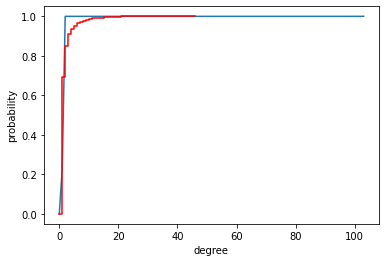

In [364]:
plt.plot(ecdf)
plt.xlabel('degree')
plt.ylabel('probability')
# plt.title('Empirical CDF')


q_seq, p_seq = stats['degree_cdf']
plt.plot(
    np.append(np.repeat(q_seq, 2)[1:], q_seq[-1]), 
    np.repeat(p_seq, 2), color='r'
)
plt.show()
